In [1]:
# import require libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection

In [2]:
# print current working directory
os.chdir('/Users/tampham/Desktop')
print("Current working directory:", os.getcwd())


Current working directory: /Users/tampham/Desktop


In [3]:
# Load data
EV = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [4]:
# display first five rows
EV.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
EV.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [6]:
# We need to to describe the data to know what the next step
EV.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,247340.000000,247344.000000,247324.000000,247324.000000,246791.000000,2.473440e+05,2.473400e+05
mean,98180.773999,2021.572450,44.645659,740.206308,29.039924,2.382157e+08,5.297516e+10
std,2496.155753,3.014246,82.945315,6971.140984,14.857603,6.709585e+07,1.606887e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,18.000000,2.089133e+08,5.303301e+10
50%,98125.000000,2023.000000,0.000000,0.000000,33.000000,2.560989e+08,5.303303e+10
75%,98382.000000,2024.000000,37.000000,0.000000,42.000000,2.723745e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


# DATA CLEANING

In [8]:
# get duplicate
EV = EV.drop_duplicates()

In [9]:
# Check for any missing values
missing_values = EV.isnull().sum()

In [10]:
# Check for total count of zero in the column Electric Range
zero_values = (EV['Electric Range'] == 0).sum()
zero_values


149634

In [11]:
# the percentage of 0 in regarding to the column Electric Range. 
total = EV['Electric Range'].notna().sum()
percent_zero = zero_values / total * 100
percent_zero

60.50120489721984

In [12]:
# I will replace these zero as N/A, so it will not interfer with the resuls when we do further analysis.
EV['Electric Range'] = EV['Electric Range'].replace(0, pd.NA)

In [13]:
# Check for zero on Base MSRP
zero_values_2 = (EV['Base MSRP'] == 0).sum()
zero_values_2

244108

In [14]:
# Percentatage toward non-null data
percent = zero_values_2 / total * 100
percent

98.69968138959422

In [15]:
# Since zero dominates almost 98 % of the column. I will drop this Base MSRP column
EV = EV.drop(columns=['Base MSRP'])
EV.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

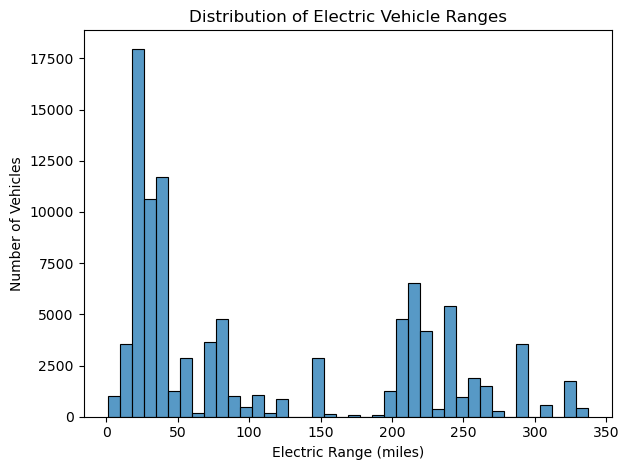

In [18]:
# Histogram of Electric Range
sns.histplot(EV['Electric Range'].dropna(), bins=40, kde=False) # use bins for better resolution
plt.title("Distribution of Electric Vehicle Ranges")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Number of Vehicles")
plt.tight_layout()
plt.show()

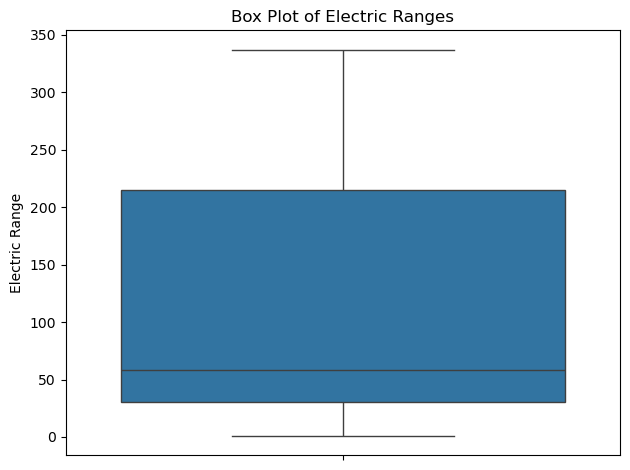

In [19]:
# Box Plot for Electric Range
sns.boxplot(EV['Electric Range'])
plt.title("Box Plot of Electric Ranges")
plt.ylabel("Electric Range")
plt.tight_layout()
plt.show()

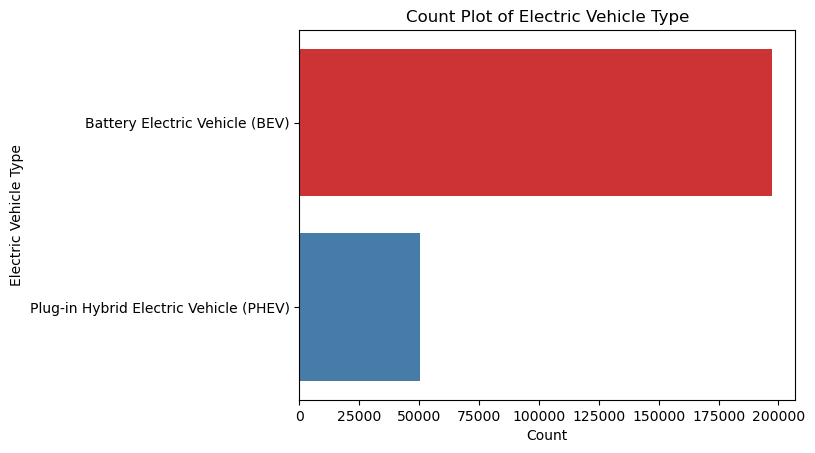

In [20]:
# Countplot for Vehicle Type
sns.countplot(EV['Electric Vehicle Type'])
plt.title("Count Plot of Electric Vehicle Type")
plt.xlabel("Count")
plt.ylabel("Electric Vehicle Type")
ax = sns.countplot(y=EV['Electric Vehicle Type'])
sns.countplot(y="Electric Vehicle Type", data=EV, hue="Electric Vehicle Type", palette="Set1", legend = False)
plt.show()


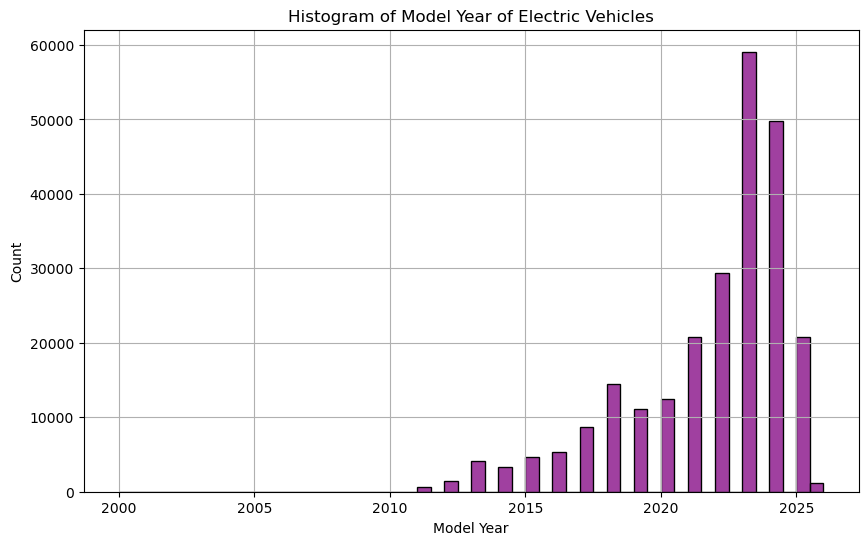

In [21]:
# Histogram of Model Year
plt.figure(figsize=(10,6))
sns.histplot(data=EV,x='Model Year', binwidth=0.5,color='Purple')
plt.title("Histogram of Model Year of Electric Vehicles")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


Make
TESLA        105001
CHEVROLET     17840
NISSAN        15892
FORD          13270
KIA           11978
BMW           10370
TOYOTA        10245
HYUNDAI        8048
RIVIAN         7491
VOLVO          6428
Name: count, dtype: int64


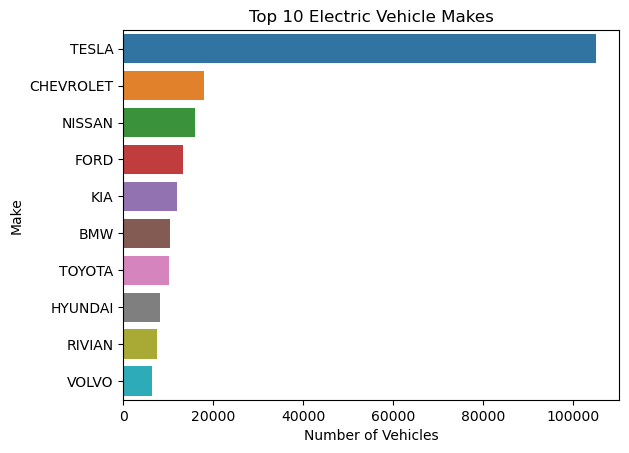

In [22]:
# Top 10 Make Electric vehicles
top_makes = EV['Make'].value_counts().nlargest(10)
print(top_makes)
sns.barplot(y=top_makes.index, x=top_makes.values, hue=top_makes.index, palette="tab10", legend = False)
plt.title("Top 10 Electric Vehicle Makes")
plt.xlabel("Number of Vehicles")
plt.ylabel("Make")
plt.show()

Make_Model
TESLA MODEL Y          51528
TESLA MODEL 3          37427
NISSAN LEAF            13950
TESLA MODEL S           7912
CHEVROLET BOLT EV       7463
TESLA MODEL X           6656
FORD MUSTANG MACH-E     5366
VOLKSWAGEN ID.4         5198
CHEVROLET VOLT          4686
JEEP WRANGLER           4534
Name: count, dtype: int64


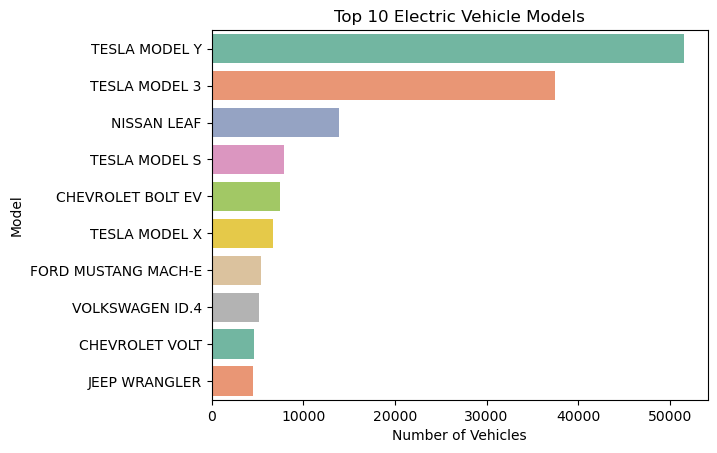

In [23]:
# Top 10 Model Electric Vehicle
# Combine Model and Make of Electric Vehicle
EV['Make_Model'] = EV['Make'] + " " + EV['Model']
# print top 10
top_model = EV['Make_Model'].value_counts().nlargest(10)
print(top_model)
# plot
sns.barplot(y=top_model.index, x=top_model.values, hue=top_model.index, palette="Set2", legend = False)
plt.title("Top 10 Electric Vehicle Models")
plt.xlabel("Number of Vehicles")
plt.ylabel("Model")
plt.show()

# BIVARIATE ANALYSIS


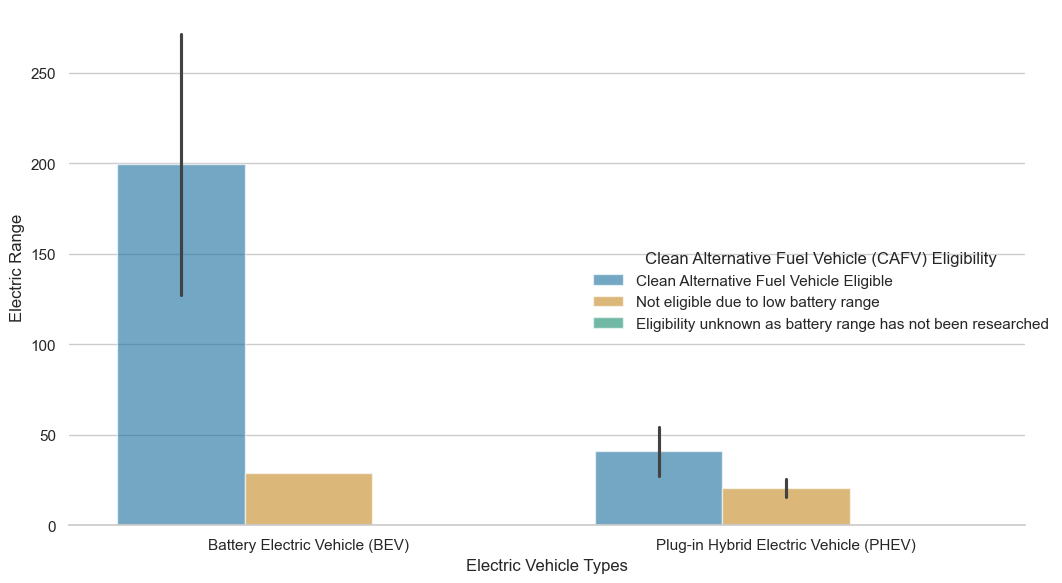

In [25]:
# Plot for Eletric Vehicle Types with Electric Range under CAFV Eligibility
# Set the theme
sns.set_theme(style="whitegrid")
# Create the categorical plot
B = sns.catplot(
    data=EV, 
    kind="bar", 
    x='Electric Vehicle Type',
    y='Electric Range', 
    hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', errorbar="sd", palette="colorblind", alpha=0.6, height=6)
# Customize the plot
B.despine(left=True)
B.set_axis_labels("Electric Vehicle Types", "Electric Range")
plt.tight_layout()
plt.show()

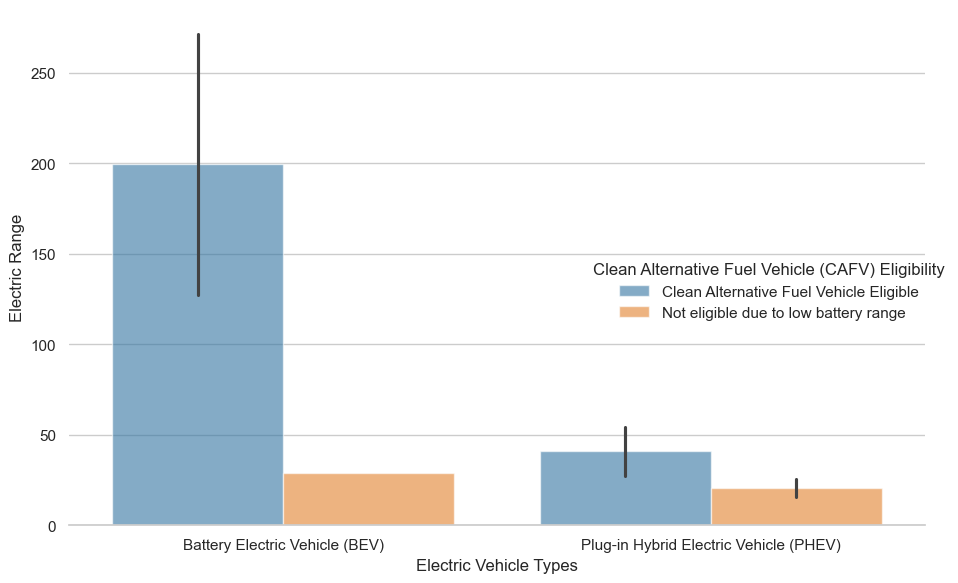

In [26]:
# As you can see from the above plot, we did not have any information for Eligibility unknown as battery range has not been researched.
# Filter this column, we will only show information for Clean Alternative Fuel Vehicle Eligible and Not Eligible due to low battery range

EV1 = EV[EV['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 
                 'Eligibility unknown as battery range has not been researched']
# plot
sns.set_theme(style="whitegrid")
C = sns.catplot(
    data=EV1, 
    kind="bar", 
    x='Electric Vehicle Type',
    y='Electric Range', 
    hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', errorbar="sd", palette="tab10", alpha=0.6, height=6)
# Customize the plot
C.despine(left=True)
C.set_axis_labels("Electric Vehicle Types", "Electric Range")
plt.tight_layout()
plt.show()

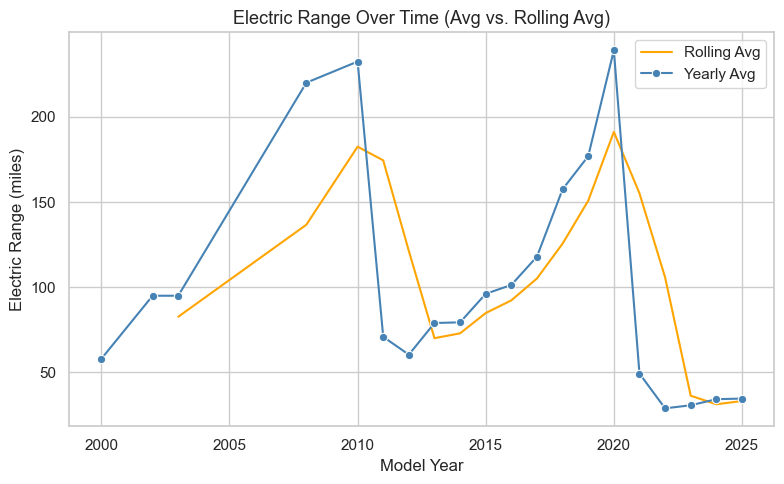

In [27]:
# Group by Model Year to get the average Electric Range per year
avg_range = EV.groupby('Model Year')['Electric Range'].mean().reset_index()

# Calculate the 3-year rolling average
avg_range['Rolling Avg'] = avg_range['Electric Range'].rolling(3).mean()

# Plot both lines
plt.figure(figsize=(8, 5))

# Orange line: Rolling average
sns.lineplot(data=avg_range, x='Model Year', y='Rolling Avg', label='Rolling Avg', color='orange')

# Blue line: Actual yearly average (with dots)
sns.lineplot(data=avg_range, x='Model Year', y='Electric Range', marker='o', label='Yearly Avg', color='steelblue')

# Customize plot
plt.title("Electric Range Over Time (Avg vs. Rolling Avg)", fontsize=13)
plt.ylabel("Electric Range (miles)")
plt.xlabel("Model Year")
plt.legend()
plt.tight_layout()
plt.show()


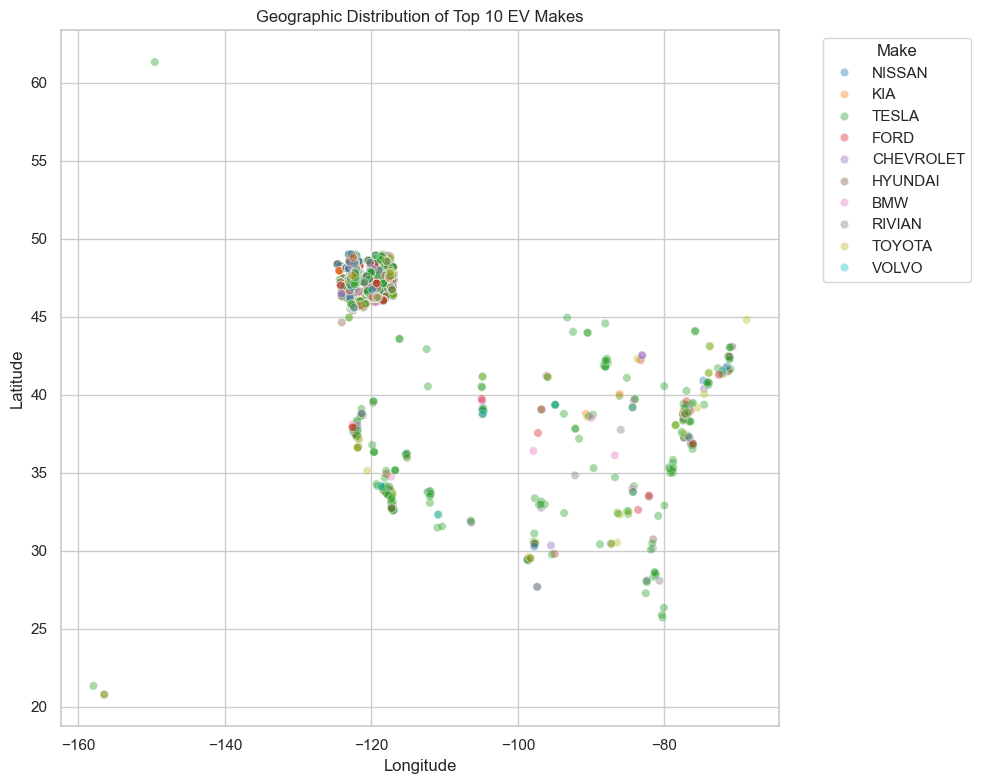

In [28]:
# Extract longtitude and latitude
EV['lon'] = EV['Vehicle Location'].str.extract(r'POINT \(([-\d.]+)')[0].astype(float)
EV['lat'] = EV['Vehicle Location'].str.extract(r'POINT \([-\d.]+ ([\d.]+)')[0].astype(float)
# Filter for top 10 Makes
top_10_makes = EV['Make'].value_counts().nlargest(10).index
EV_top10 = EV[EV['Make'].isin(top_10_makes)]
# plot
plt.figure(figsize=(10, 8))
sns.scatterplot( data=EV_top10, x='lon', y='lat', hue='Make', alpha=0.4, palette='tab10')
# Customize plot
plt.title("Geographic Distribution of Top 10 EV Makes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# APPLY MACHINE LEARNING MODEL: DECISION TREE


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode categorical features
features = ['Make', 'Model Year', 'County', 'Electric Utility']
EV_tree = EV_top10[features + ['Electric Vehicle Type']].dropna()
# Separate feature and target
X = EV_tree[features]
y = EV_tree['Electric Vehicle Type']
# Convert string into number
X = X.apply(LabelEncoder().fit_transform)
le_y = LabelEncoder()
y = le_y.fit_transform(y)
print(le_y.classes_)

['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']


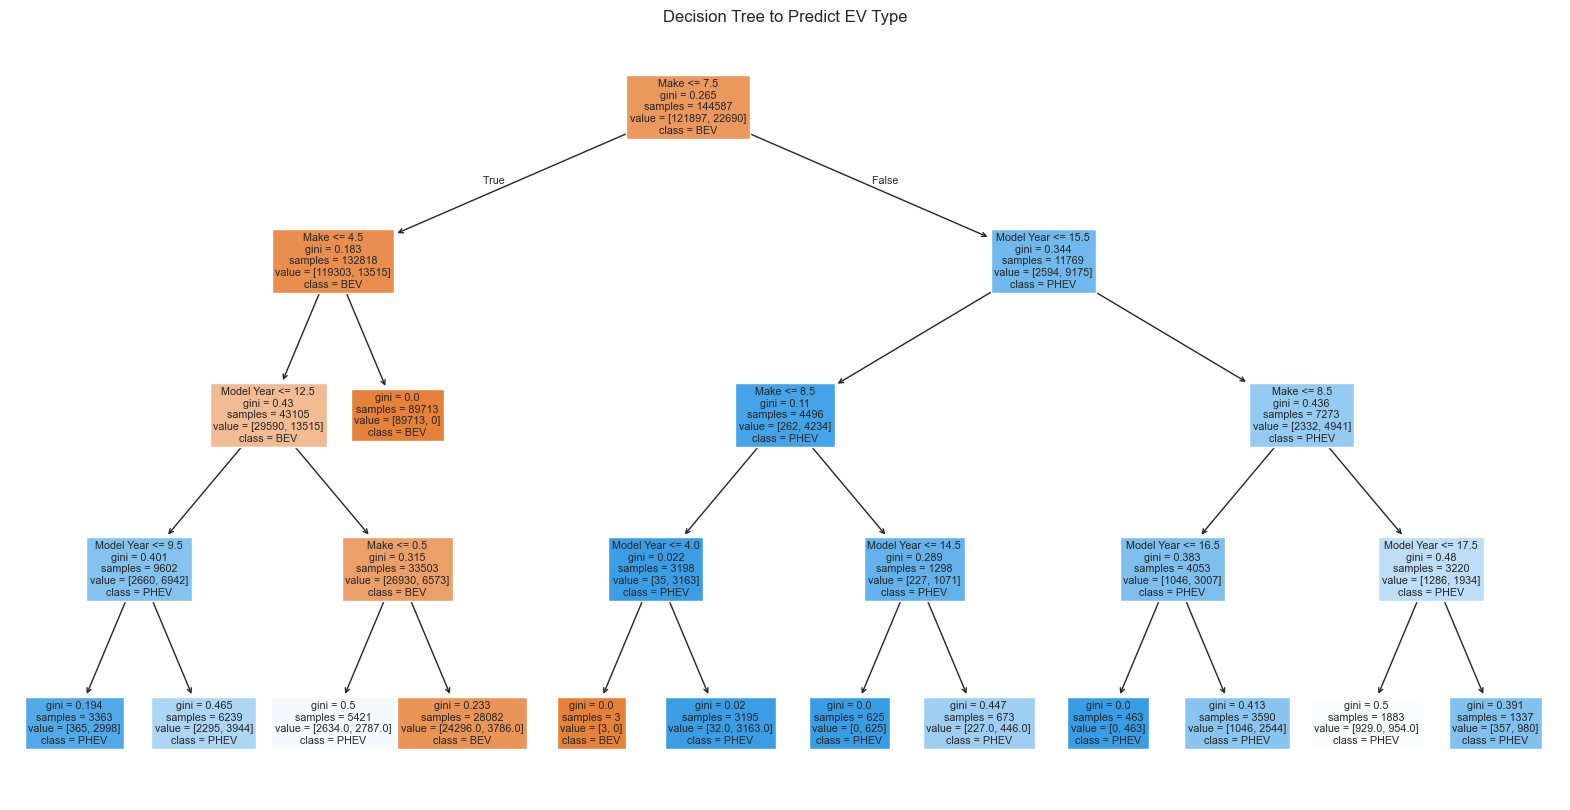

In [69]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train the Decision Tree Model
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
# Visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['BEV', 'PHEV'], filled=True)
plt.title("Decision Tree to Predict EV Type")
plt.show()


              precision    recall  f1-score   support

         BEV       0.97      0.93      0.95     52475
        PHEV       0.69      0.83      0.75      9491

    accuracy                           0.92     61966
   macro avg       0.83      0.88      0.85     61966
weighted avg       0.93      0.92      0.92     61966



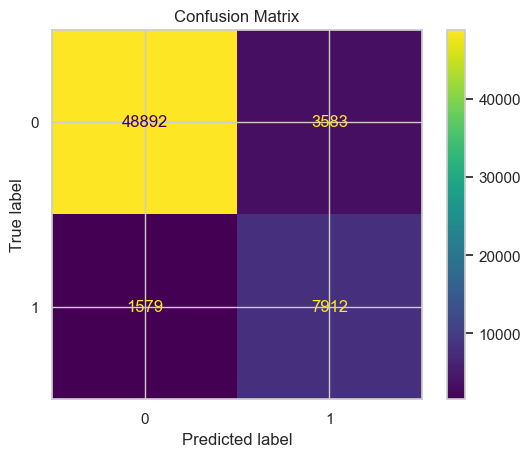

In [71]:
# Print classification report and Confusion Matrix using sklearn
from sklearn.metrics import classification_report as cr, confusion_matrix as cm,ConfusionMatrixDisplay as cmd
# Caculate prediciton
y_pred = tree.predict(X_test)
# Print classification report
print(cr(y_test,y_pred, target_names=['BEV', 'PHEV']))
# Confusion Matrix
cmd.from_estimator(tree, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()



<Axes: >

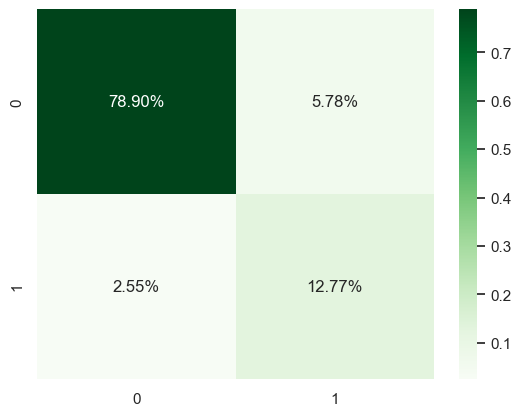

In [73]:
# Plot Confusion Matrix using Sklearn and Seaborn
CM = cm(y_test,y_pred)
sns.heatmap(CM/np.sum(CM), annot=True, 
            fmt='.2%', cmap='Greens')


#### So the original model favors over the majority class - BEV over the minority class - PHEV. 
#### They classify 78.90 % correctly for BEV (class 0) but only 12.77 % for PHEV (class 1). 


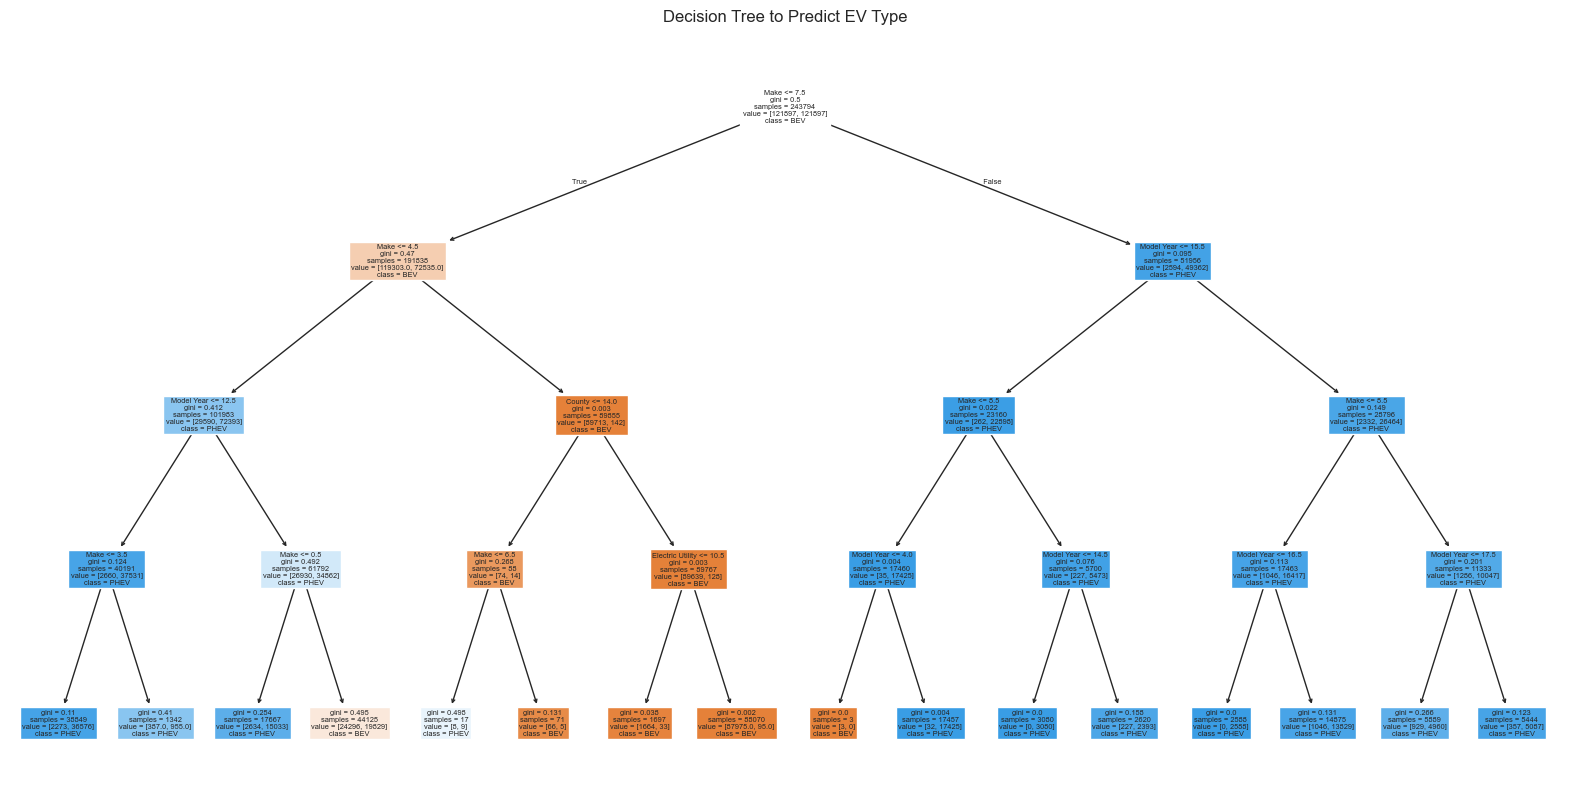

In [75]:
from imblearn.over_sampling import SMOTE

# Perform random sampling with SMOTE
smote = SMOTE (random_state = 0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Train Decision Tree
tree1 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree1.fit(X_train_smote, y_train_smote)
# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(tree1, feature_names=X.columns, class_names=['BEV', 'PHEV'], filled=True)
plt.title("Decision Tree to Predict EV Type")
plt.show()



In [77]:
import numpy as np
import pandas as pd
# BEFORE SMOTE
print("Before SMOTE class counts:")
print(pd.Series(y_train).value_counts())        # or: np.unique(y_train, return_counts=True)

# AFTER SMOTE
print("\nAfter SMOTE class counts:")
print(pd.Series(y_train_smote).value_counts())  # y_train_smote is the resampled array


Before SMOTE class counts:
0    121897
1     22690
Name: count, dtype: int64

After SMOTE class counts:
0    121897
1    121897
Name: count, dtype: int64


Classification Report after SMOTE:
              precision    recall  f1-score   support

         BEV       0.97      0.93      0.95     52475
        PHEV       0.69      0.83      0.75      9491

    accuracy                           0.92     61966
   macro avg       0.83      0.88      0.85     61966
weighted avg       0.93      0.92      0.92     61966



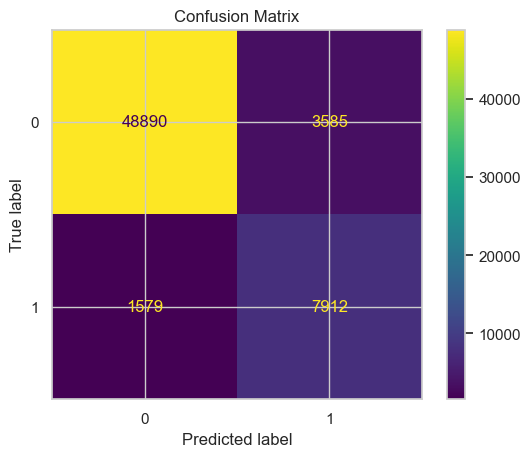

In [79]:
# Predict with the new model trained on SMOTE data
y_pred1 = tree1.predict(X_test)
# classification report
print("Classification Report after SMOTE:")
print(cr(y_test, y_pred1, target_names=['BEV', 'PHEV']))
# Confusion matrix
cmd.from_estimator(tree1, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()



Text(0.5, 1.0, 'Confusion Matrix After SMOTE')

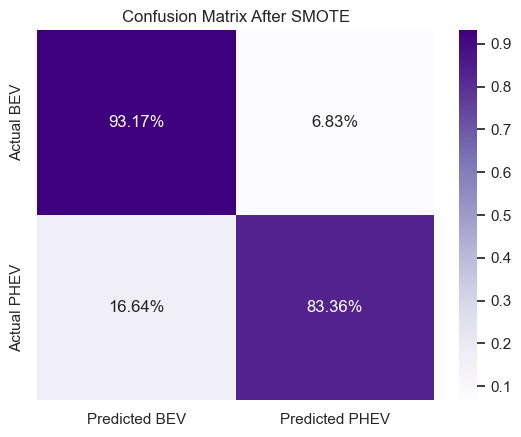

In [81]:
# Plot Confusion Matrix using Sklearn and Seaborn
CM1 = cm(y_test,y_pred1)
# Normalize each row — gives you per-class recall visually
CM1_normalized = CM1.astype('float') / CM1.sum(axis=1)[:, np.newaxis]

# Plot with seaborn
sns.heatmap(CM1_normalized, annot=True, fmt='.2%', cmap='Purples', 
            xticklabels=['Predicted BEV', 'Predicted PHEV'],
            yticklabels=['Actual BEV', 'Actual PHEV'])

plt.title("Confusion Matrix After SMOTE")
